# Overview
Let's start to understand LS by using a simple dataset with a single independent variable and a single observed variable (I use the term "observed" as correlation does not mean causation).

The first dataset is available here: <https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression>

In [1]:
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

/Users/anurags/miniforge3/envs/tensorflow_exp/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Dataset 1: Salary Data

In [2]:
df = pd.read_csv("../data/Salary_Data.csv")

df.dropna(inplace=True)
print(df.head())
df.describe()

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Data Visualization
Let's visualize the data points to get an idea of our data.

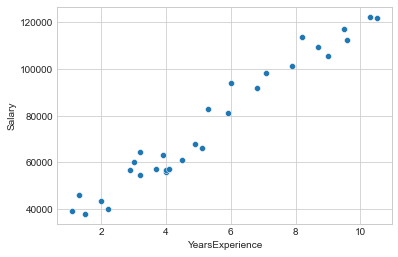

In [3]:
ax = sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])

Maybe we want to know how the Years of Experience (YoE) in an industry, correlates to the Salary earned by individuals.

We can see that Years of Experience correlates very well with Salary earned. Through the visualization, we can see that there's a linear trend between the two variables, and that this dataset doesn't contain extreme outliers.

To find the linear relation between YoE and Salary, we can fit a line to the data.

In order to fit a line to the data, we should start by calculating $ R^2 $.

Let's start with a line y = min(Salary) + range(Salary)/2 or y ~ 80000.

In [4]:
y_max, y_min = df.Salary.max(), df.Salary.min()
print("Max and min salaries: {} and {}".format(y_max, y_min))
y_intercept = y_min + (y_max - y_min) / 2
print("Our initial fitted line y = {}".format(y_intercept))
avg_salary = df.Salary.mean()
print("Average salary: {}".format(avg_salary))

# List of salaries - The Y variable
salaries = df.Salary.tolist()
# List of Years of Experience - The X variable
yoe = df["YearsExperience"].tolist()

print("Sum of squares of distances about the mean")
# Sum of squares of distances about the mean
sum_sq_mean = 0
for p in salaries:
    sum_sq_mean += (avg_salary - p) ** 2
print(sum_sq_mean)

# Using pythonic list comprehension
sum_sq_mean = sum([(num - avg_salary) ** 2 for num in salaries])
print(sum_sq_mean)

# Using NumPy
m = 0  # since we are using the line y = df.Salary.mean(), which is a line that is horizontal and parallel to the x-axis.
sum_sq_mean = np.sum(np.square(np.array(salaries) - avg_salary - (m * np.array(yoe))))
print("Calculation using full formula: ", sum_sq_mean)
sum_sq_mean = np.sum(np.power(np.subtract(salaries, avg_salary), 2))
print("Calculation using y = c : \t", sum_sq_mean)

Max and min salaries: 122391.0 and 37731.0
Our initial fitted line y = 80061.0
Average salary: 76003.0
Sum of squares of distances about the mean
21794977852.0
21794977852.0
Calculation using full formula:  21794977852.0
Calculation using y = c : 	 21794977852.0


In [5]:
# Variation about the mean = ((data - mean)^2)/n    where 'n' is the sample size.
var_mean = sum_sq_mean / len(salaries)
print("Variation about the mean")
print(var_mean)

# Variation about the fit = ((data - fit)^2)/n    where 'n' is the sample size.
# Let's call this SS_fit
sum_sq_fit = np.sum(np.power(np.subtract(salaries, y_intercept), 2))
var_fit = sum_sq_fit / len(salaries)
print("Variation about Fit")
print(var_fit)

Variation about the mean
726499261.7333333
Variation about Fit
742966625.7333333


### Visualizing the Intial fitted line and Mean

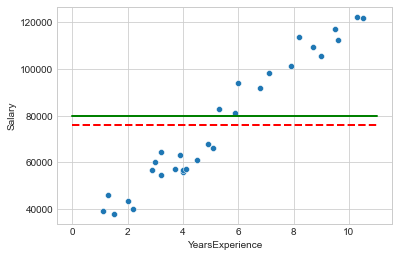

In [6]:
ax = sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])
plt.plot([0, math.ceil(df["YearsExperience"].max())], [avg_salary, avg_salary], label="Mean Salary", linestyle='dashed', linewidth=2, color='r')
plt.plot([0, math.ceil(df["YearsExperience"].max())], [y_intercept, y_intercept], label="Initial Fit", linewidth=2, color='g')

### R Squared
We know formula for $ R^2 $ is:

$$
R^2 = \frac{Var(mean) - Var(fit)}{Var(mean)}
$$

$ R^2 $ can also be calculated as 

$$
R^2 = \frac{SumOfSquares(mean) - SumOfSquares(fit)}{SumOfSquares(mean)}
$$

In [7]:
r_sq = (sum_sq_mean - sum_sq_fit) / sum_sq_mean
print("R Squared = {}".format(r_sq))

R Squared = -0.022666731912033878


From the above result, we can see that our initial line is very bad at predicting Salary based on Years of Experience.

Let's consider a line passing through the points p1 = [0, 30_000] and p2 = [10, 120_000].

We can see that, with an eye-test, on the graph, that such a line seems to fit the data pretty well.

This example line has, slope = 9k, and c = 30k. 
So, $ y = mx + c = 9000*x + 30000 $.

11


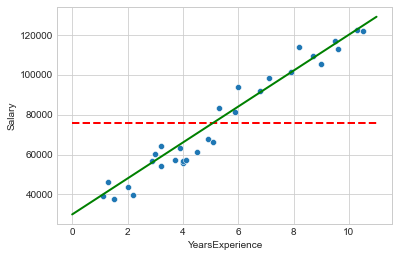

In [8]:
# Let's say our line is given by y = m * x + c, where m = 9000, c = 30k
ax = sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])
x_max_rounded = math.ceil(df["YearsExperience"].max())
print(x_max_rounded)
plt.plot([0, x_max_rounded], [avg_salary, avg_salary], label="Mean Salary", linestyle='dashed', linewidth=2, color='r')
plt.plot([0, x_max_rounded], [30000, 129000], label="Initial Fit", linewidth=2, color='g')

Let's calculate the residuals

In [9]:
c = 30000
m = 9000
# Y - intercepts for each X value i.e. Salary value for each Years of Experience value predicted by the line given by y = m * x + c.
y = np.array(salaries)
x = np.array(yoe)
# slope = ((x-x.mean())*(y-y.mean())).sum()/(np.square(x-x.mean())).sum()
# y_intercept = y.mean() - (m * x.mean())
# print(slope, y_intercept)
sum_sq_fit = np.sum(np.square(y - c - (m * x)))
print(sum_sq_fit)

r_sq = (sum_sq_mean - sum_sq_fit) / sum_sq_mean
print("R Squared = {}".format(r_sq))


1084460122.0
R Squared = 0.9502426600584737


9000 30000 6
For Years of Experience = 6, Salary predicted is 84000
11


[Text(0.5, 1.0, 'Prediction of Salary using line y = 9k * x + 30k for YoE = 6')]

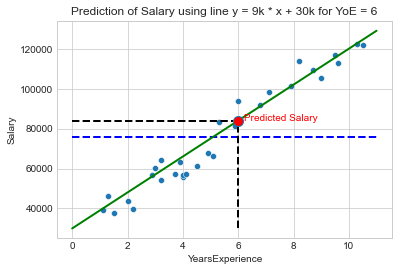

In [10]:
# Predicting Salary using this line.
def predict(slope, intercept, x_val):
    return slope * x_val + intercept

test_yoe = 6
print(m, c, test_yoe)
sal = predict(slope=m, intercept=c, x_val=test_yoe)
print("For Years of Experience = {}, Salary predicted is {}".format(test_yoe, sal))

# Plot prediction
ax = sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])
x_max_rounded = math.ceil(df["YearsExperience"].max())
print(x_max_rounded)
plt.plot([0, x_max_rounded], [avg_salary, avg_salary], label="Mean Salary", linestyle='dashed', linewidth=2, color='b')
plt.plot([0, x_max_rounded], [30000, 129000], label="Initial Fit", linewidth=2, color='g')
plt.plot(test_yoe, sal, marker="o", markersize=10, markerfacecolor="r")
plt.plot([0, test_yoe - 0.2], [sal, sal], linestyle='dashed', linewidth=2, color='black')
plt.plot([test_yoe, test_yoe], [c, sal - 3000], linestyle='dashed', linewidth=2, color='black')
plt.annotate(text="Predicted Salary", xy=[test_yoe + 0.2, sal], color='r')
ax.set(title="Prediction of Salary using line y = 9k * x + 30k for YoE = {}".format(test_yoe))

As we can see, the residuals reduced dramatically due to the well-fitting line considered, and $ R^2 $ is now 0.95, or in other words, the line tracking Years of Experience explains 95% of the variation in Salary earned.

Let's try to improve this by trying to find a line which gives us the least residuals or gives us the best R^2.

In [11]:
# Using NumPy
# Let's add a column to x, which will be the biases for the Least Squares algorithm.
A = np.vstack([x, np.ones(len(x))]).T
B = y.copy()
least_sq = np.linalg.lstsq(A, B, rcond=None)
print(least_sq)

best_fit_line = least_sq[0]
print("Best fit line has slope = {} and y_intercept = {}".format(best_fit_line[0], best_fit_line[1]))

(array([ 9449.96232146, 25792.20019867]), array([9.38128552e+08]), 2, array([33.2288172 ,  2.51906874]))
Best fit line has slope = 9449.962321455072 and y_intercept = 25792.20019866871


Let's see what this line looks like and calculate it's $ R^2 $.

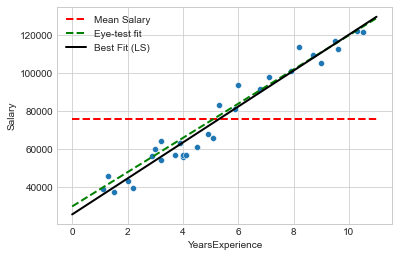

In [12]:
ax = sns.scatterplot(x=df["YearsExperience"], y=df["Salary"])
x_max_rounded = math.ceil(df["YearsExperience"].max())
plt.plot([0, x_max_rounded], [avg_salary, avg_salary], label="Mean Salary", linestyle='dashed', linewidth=2, color='r')
plt.plot([0, x_max_rounded], [30000, 129000], label="Eye-test fit", linewidth=2, linestyle='dashed', color='g')
plt.plot([0, x_max_rounded], [best_fit_line[1], x_max_rounded * best_fit_line[0] + best_fit_line[1]], label="Best Fit (LS)", linewidth=2, color='black')
plt.legend()

We see in the above how the best fit line looks like, and how it compares to our quick eye-test based line.



In [13]:
sum_sq_fit = np.sum(np.square(y - best_fit_line[1] - (best_fit_line[0] * x)))
print(sum_sq_fit)

r_sq = (sum_sq_mean - sum_sq_fit) / sum_sq_mean
print("R Squared = {}".format(r_sq))
print("The best fit line explains {:.2f} % of the variation in Salary earned as Years of experience changes.".format(r_sq * 100))

938128551.668429
R Squared = 0.9569566641435084
The best fit line explains 95.70 % of the variation in Salary earned as Years of experience changes.
